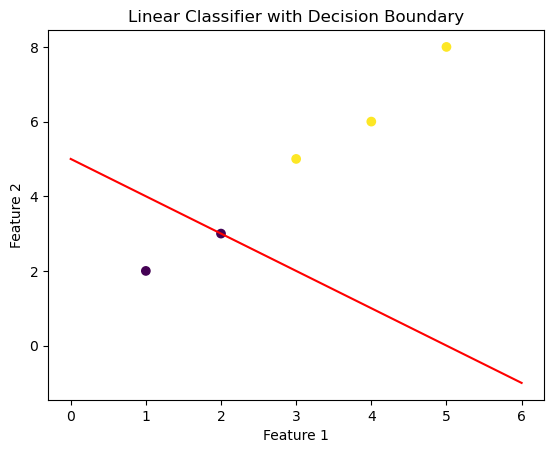

In [1]:
'''1)	Define a linear classifier using the function y=Wx+b in Python. Explain how changes in the line's slope and intercept affect classification.
•	The function y = Wx + b is a simple linear classifier where W represents the weight (slope) and b represents the bias (intercept).
•	Changes in the slope (W) affect the angle or direction of the decision boundary (line), while changes in the intercept (b) shift the line vertically. This boundary separates the two classes in binary classification. If the boundary changes, the points that lie on either side of the boundary can change classification.
•	And here is the Python Code:'''
import numpy as np
import matplotlib.pyplot as plt
# Define a linear classifier: y = Wx + b
def linear_classifier(W, b, X):
    return np.dot(W, X) + b
# Sample data points (2D for visualization)
X = np.array([[1, 2], [2, 3], [3, 5], [4, 6], [5, 8]])
y = np.array([0, 0, 1, 1, 1])  # Labels for the data points
# Plot the points
plt.scatter(X[:, 0], X[:, 1], c=y)
# Define W (slope) and b (intercept)
W = np.array([1, 1])  # slope of the line
b = -5               # intercept
# Plot decision boundary (line y = Wx + b)
x_vals = np.linspace(0, 6, 100)
y_vals = -(W[0] * x_vals + b) / W[1]
plt.plot(x_vals, y_vals, color='red')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Linear Classifier with Decision Boundary')
plt.show()



In [2]:
'''2)	 Define what a loss function is in the context of machine learning models. Then, using Python, implement a simple mean squared error (MSE) loss function. Apply this function to evaluate the difference between predicted and actual values in a small dataset.
•	A loss function measures the difference between the predicted values and the actual values in a dataset. It guides the optimization process by providing feedback on how well the model performs.
•	The Mean Squared Error (MSE) loss function is a common loss function that calculates the average squared differences between predicted and actual values.
•	And here is the Python Code:
'''
import numpy as np

# Define the Mean Squared Error (MSE) loss function
def mse_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Sample data
y_true = np.array([3, -0.5, 2, 7])
y_pred = np.array([2.5, 0.0, 2, 8])

# Calculate the loss
mse = mse_loss(y_true, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 0.375


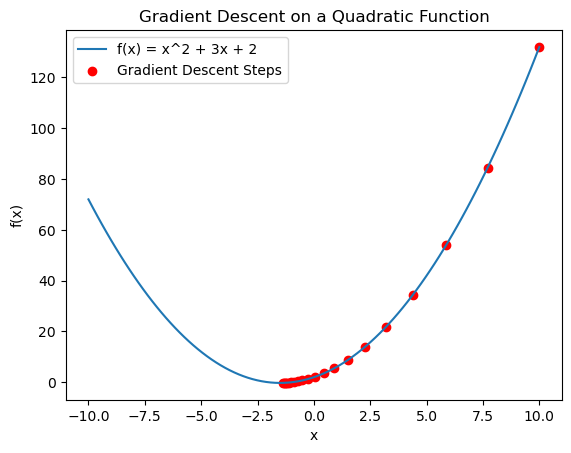

In [4]:
'''3)	Explain the concept of gradient descent and its importance in optimizing machine learning models. Write a Python script that demonstrates a simple gradient descent algorithm to find the minimum of a quadratic function. Visualize the steps taken by the algorithm on a plot.
•	Gradient descent is an optimization algorithm used to minimize a function by iteratively adjusting parameters in the opposite direction of the gradient (slope) of the function with respect to the parameters. It helps find the optimal parameters that minimize the loss in machine learning models.
•	And here is the python code:
'''
import numpy as np
import matplotlib.pyplot as plt

# Define a quadratic function f(x) = x^2 + 3x + 2
def f(x):
    return x**2 + 3*x + 2

# Derivative of the function f'(x) = 2x + 3
def f_prime(x):
    return 2*x + 3

# Gradient Descent parameters
x = 10  # Starting point
learning_rate = 0.1
num_iterations = 20

# Lists to store the progress of x and the function value
x_vals = [x]
f_vals = [f(x)]

# Gradient Descent loop
for i in range(num_iterations):
    x = x - learning_rate * f_prime(x)
    x_vals.append(x)
    f_vals.append(f(x))

# Plot the function and the steps of Gradient Descent
x_range = np.linspace(-10, 10, 100)
plt.plot(x_range, f(x_range), label='f(x) = x^2 + 3x + 2')
plt.scatter(x_vals, f_vals, color='red', label='Gradient Descent Steps')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.title('Gradient Descent on a Quadratic Function')
plt.show()


In [5]:
'''4)	 Describe the architecture of a multi-layer perceptron (MLP). Using PyTorch, create a simple MLP with one hidden layer to perform a binary classification task on a small dataset. Include activation functions and initialize weights randomly.
•	A multi-layer perceptron (MLP) is a type of neural network consisting of multiple layers: an input layer, one or more hidden layers, and an output layer. Each layer has neurons, and each neuron in one layer is connected to neurons in the next layer. An activation function is applied to the outputs of neurons to introduce non-linearity.
•	And here is the Python Code:
'''
import torch
import torch.nn as nn
import torch.optim as optim

# Define a simple MLP with one hidden layer for binary classification
class SimpleMLP(nn.Module):
    def __init__(self):
        super(SimpleMLP, self).__init__()
        self.hidden = nn.Linear(2, 4)  # Hidden layer with 4 neurons
        self.output = nn.Linear(4, 1)  # Output layer with 1 neuron
        self.sigmoid = nn.Sigmoid()    # Activation function

    def forward(self, x):
        x = torch.relu(self.hidden(x)) # ReLU activation for hidden layer
        x = self.sigmoid(self.output(x)) # Sigmoid for binary classification
        return x

# Initialize the model, loss function, and optimizer
model = SimpleMLP()
loss_function = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Dummy dataset
X_train = torch.tensor([[1.0, 2.0], [2.0, 3.0], [3.0, 4.0], [4.0, 5.0]])
y_train = torch.tensor([[0.0], [0.0], [1.0], [1.0]])
# Train the model
for epoch in range(100):
    model.train()
    optimizer.zero_grad()
    output = model(X_train)
    loss = loss_function(output, y_train)
    loss.backward()
    optimizer.step()

print("Training complete.")


Training complete.


In [7]:
'''5)	Explain the backpropagation algorithm and its role in training neural networks. Modify your MLP code to include a backpropagation function that updates the weights based on the gradient of the loss. Test the training process with a few epochs and observe the change in loss.
•	Backpropagation is the algorithm used to calculate the gradient of the loss function with respect to the weights of the network. These gradients are then used to update the weights using an optimization algorithm like gradient descent. This process helps the neural network learn by minimizing the loss function.
•	The code from Part 4 already implements backpropagation with loss.backward() and optimizer.step() which updates the weights.
•	To observe the loss changes during training:
'''
# Track loss over epochs
for epoch in range(100):
    model.train()
    optimizer.zero_grad()
    output = model(X_train)
    loss = loss_function(output, y_train)
    loss.backward()
    optimizer.step()

    if epoch % 10 == 0:  # Print loss every 10 epochs
        print(f"Epoch {epoch}, Loss: {loss.item()}")


Epoch 0, Loss: 0.5512795448303223
Epoch 10, Loss: 0.5484603643417358
Epoch 20, Loss: 0.5456308126449585
Epoch 30, Loss: 0.5427907705307007
Epoch 40, Loss: 0.5399401187896729
Epoch 50, Loss: 0.5370784997940063
Epoch 60, Loss: 0.534205973148346
Epoch 70, Loss: 0.5313224196434021
Epoch 80, Loss: 0.5284276604652405
Epoch 90, Loss: 0.5255218148231506


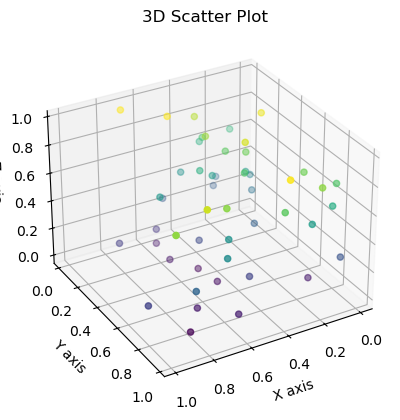

In [9]:
'''6)	Introduce 3D representation of data and its significance. Use Python to generate a 3D scatter plot of a small dataset with random values. Experiment with diLerent viewpoints and colors to enhance the visualization.
•	3D representation of data is useful when visualizing datasets that have three features. It helps in exploring patterns or clusters that might not be visible in 2D.
•	And here is the Python Code:
'''
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generate random 3D data
np.random.seed(42)
X = np.random.rand(50, 3)

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with color gradient
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=X[:, 2], cmap='viridis')

# Set labels and title
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.set_title('3D Scatter Plot')

# Change the viewpoint
ax.view_init(30, 60)  # Elevation and azimuthal angle
plt.show()



In [1]:
'''Part 2: 3D shape images
•	I chose to select my favorite enemy to be my selected model for this project! Which is!! Pikachu! Yeee.
•	The website used to do get the model is: Poly Pizza which is supported by google and is for free. 
•	https://poly.pizza/m/9Apgj-wpfgb
'''

'Part 2: 3D shape images\n•\tI chose to select my favorite enemy to be my selected model for this project! Which is!! Pikachu! Yeee.\n•\tThe website used to do get the model is: Poly Pizza which is supported by google and is for free. \n•\thttps://poly.pizza/m/9Apgj-wpfgb\n'

In [11]:
'''
Part3: PyTorch3d:
It's on another file since it's big code. 
'''

'\nPart3: PyTorch3d:\n'